In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
import statistics
import warnings
from collections import Counter
import math
from collections import Counter
style.use('fivethirtyeight')

In [10]:
plot1=[1,3]
plot2=[2,5]

euclidean_distance = np.sqrt( (plot1[0]-plot2[0])**2 + (plot1[1]-plot2[1])**2) 

In [81]:
dataset= {'k':[[1,2],[3,4],[5,6]],'r':[[2,3],[5,7],[6,8]]}
new_features = [5,6]

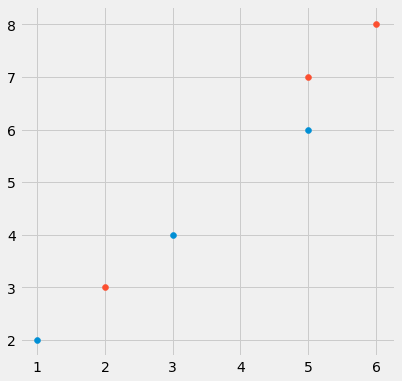

In [82]:
plt.figure(figsize=[6,6])
for key, value in dataset.items():
    xs,ys=zip(*value)
    plt.scatter(xs,ys)

    

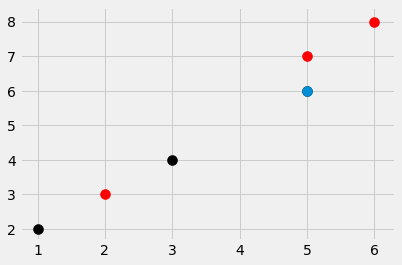

In [86]:
# A simpler way of doing it

[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
plt.scatter(new_features[0], new_features[1], s=100)


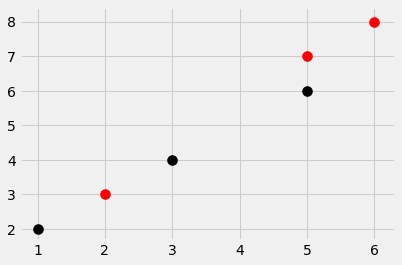

In [87]:
#It is same as
for i in dataset:
    for ii in dataset[i]:
        plt.scatter(ii[0],ii[1],s=100,color=i)

In [117]:
def k_nearest_neighbours(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances=[]
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
                #or
                #eucledian_distance = math.sqrt((features[0]-predict[0]**2)+(features[1]-predict[1]**2))
                #or
                #euclidean_distance=np.sqrt(np.sum(np.square(features[0]-predict[0])),np.square(features[1]-predict[1]))
                #or
            distances.append([euclidean_distance,group])
    
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    print(distances)
    print('#########')
    print(sorted(distances))
    print('$$$$$$$$$')
    print(sorted(distances)[:k])
    print('@@@@@@@@@')
    print(sorted(distances)[:k][1])
    print('#########')
    print('#########')
    return vote_result
        

In [118]:
result = k_nearest_neighbours(dataset, new_features)
print(result)

[[5.6568542494923806, 'k'], [2.8284271247461903, 'k'], [0.0, 'k'], [4.2426406871192848, 'r'], [1.0, 'r'], [2.2360679774997898, 'r']]
#########
[[0.0, 'k'], [1.0, 'r'], [2.2360679774997898, 'r'], [2.8284271247461903, 'k'], [4.2426406871192848, 'r'], [5.6568542494923806, 'k']]
$$$$$$$$$
[[0.0, 'k'], [1.0, 'r'], [2.2360679774997898, 'r']]
@@@@@@@@@
[1.0, 'r']
#########
#########
r


[[5.6568542494923806, 'k'], [2.8284271247461903, 'k'], [0.0, 'k'], [4.2426406871192848, 'r'], [1.0, 'r'], [2.2360679774997898, 'r']]
#########
[[0.0, 'k'], [1.0, 'r'], [2.2360679774997898, 'r'], [2.8284271247461903, 'k'], [4.2426406871192848, 'r'], [5.6568542494923806, 'k']]
$$$$$$$$$
[[0.0, 'k'], [1.0, 'r'], [2.2360679774997898, 'r']]
@@@@@@@@@
[1.0, 'r']
#########
#########


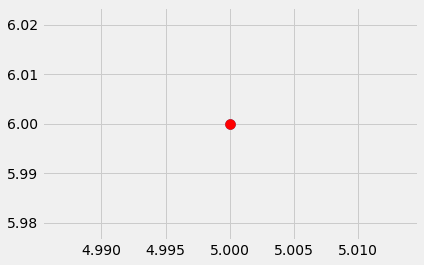

In [122]:
plt.scatter(new_features[0], new_features[1], s=100)

result = k_nearest_neighbours(dataset, new_features)
plt.scatter(new_features[0], new_features[1], s=100, color = result)  
plt.show()

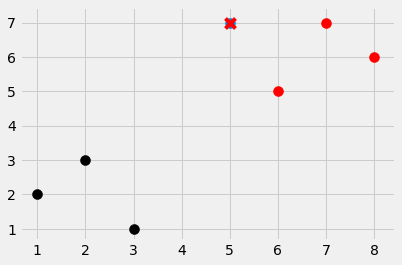

In [125]:
#complete code
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from math import sqrt
from collections import Counter
style.use('fivethirtyeight')

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
        
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])

    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    return vote_result

dataset = {'k':[[1,2],[2,3],[3,1]], 'r':[[6,5],[7,7],[8,6]]}
new_features = [5,7]
[[plt.scatter(ii[0],ii[1],s=100,color=i) for ii in dataset[i]] for i in dataset]
# same as:
##for i in dataset:
##    for ii in dataset[i]:
##        plt.scatter(ii[0],ii[1],s=100,color=i)
        
plt.scatter(new_features[0], new_features[1], s=100)

result = k_nearest_neighbors(dataset, new_features)
plt.scatter(new_features[0], new_features[1], marker='x',s=100, color = result)  
plt.show()

In [166]:
# Test this on cancer data
import pandas as pd
import random
df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()

In [167]:
random.shuffle(full_data)
test_size=0.2

In [168]:
train_data= full_data[:-int(test_size*len(full_data))]
test_data= full_data[-int(test_size*len(full_data)):]


In [169]:
df1 = pd.DataFrame(data=[[1, 2,10], [3, 4,11],[5, 6,12]],columns=['a','b','c'], index=None)

In [170]:
df1


,a,b,c
0,1,2,10
1,3,4,11
2,5,6,12


In [171]:
p=df1.values.tolist()
p

[[1, 2, 10], [3, 4, 11], [5, 6, 12]]

In [172]:
# The 2 is for the benign tumors (the same value the actual dataset used), and the 4 is for malignant tumors
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}

In [178]:
#every row of data(including all coloumns gets copied to train/test_set based on the class label of that data which is the last coloumn)
for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

In [179]:
correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        
        vote = k_nearest_neighbors(train_set,data,k=5)
        if group==vote:
            correct+=1
        total+=1
        
print('Accuracy:', correct/total)


Accuracy: 0.9712230215827338


In [184]:

#Full code for cancer data

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
import warnings
from collections import Counter
#dont forget this
import pandas as pd
import random
style.use('fivethirtyeight')

def k_nearest_neighbors(data, predict, k=3):
    if len(data) >= k:
        warnings.warn('K is set to a value less than total voting groups!')
    distances = []
    for group in data:
        for features in data[group]:
            euclidean_distance = np.linalg.norm(np.array(features)-np.array(predict))
            distances.append([euclidean_distance,group])
    votes = [i[1] for i in sorted(distances)[:k]]
    vote_result = Counter(votes).most_common(1)[0][0]
    confidence = Counter(votes).most_common(1)[0][1] / k
  
    return vote_result, confidence
    

df = pd.read_csv('breast-cancer-wisconsin.data')
df.replace('?',-99999, inplace=True)
df.drop(['id'], 1, inplace=True)
full_data = df.astype(float).values.tolist()

random.shuffle(full_data)

test_size = 0.2
train_set = {2:[], 4:[]}
test_set = {2:[], 4:[]}
train_data = full_data[:-int(test_size*len(full_data))]
test_data = full_data[-int(test_size*len(full_data)):]

for i in train_data:
    train_set[i[-1]].append(i[:-1])

for i in test_data:
    test_set[i[-1]].append(i[:-1])

correct = 0
total = 0

for group in test_set:
    for data in test_set[group]:
        vote, confidence = k_nearest_neighbors(train_set, data, k=5)
        if group == vote:
            correct += 1
        total += 1
print('Accuracy:', correct/total)
print(confidence)

Accuracy: 0.9568345323741008
1.0
